### Connie's Movie Recommendation System
***
Hello! I’m Connie, and this is all the code I used to build this Movie Recommendation System. Thank you for taking the time to run this notebook! 

(PS: I had no prior experience with TF-IDF or Cosine similarity, so this challenge was a bit difficult but still really fun, and I learned a lot.)

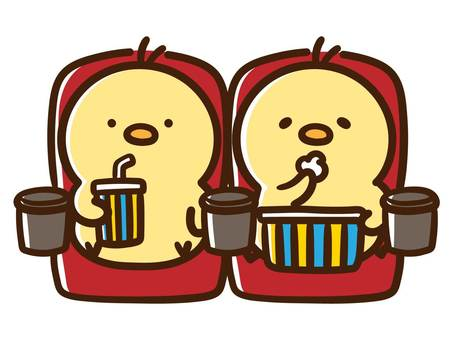

### Import Libraries
I used pandas, numpy and nltk (natural language toolkit) library.

**NOTE: If you don't have these three libraries download, please uncomment and run the below cell.**

In [3]:
# !pip install pandas==2.2.3
# !pip install numpy==1.26.4
# !pip install nltk==3.9.1

In [28]:
import pandas as pd
import numpy as np # for computation purposes
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK's stopwords to remove common words and improve the accuracy of tokenization and TF-IDF vectorization  
# nltk.download("stopwords") 

### Obtaining Data
***
I obtained the movie dataset from The Movie Database (TMDB) API because it collects the most recent data. I then saved it as "movies.csv", containing 300 of the latest English language movies along with their titles and descriptions (words are lowercased and punctuation removed).

Note: The code below performs the API request, but it's commented out since all data has already been saved to movies.csv to save time!


In [5]:
# import requests

# def get_movies(lang, freq):
#     url = 'https://api.themoviedb.org/3/movie/popular?api_key={api_key}&with_original_language={lang}'.format(api_key=api_key,lang=lang)
#     movies = []
#     page = 1
#     while len(movies) < freq:
#         try:
#             res = requests.get(url + "&page=" + str(page))
#         except:
#             raise ("not connected to internet or movidb issue")

#         # not valid status code
#         if res.status_code != 200:
#             print("error")
#             return []
#         res = res.json()
#         if "errors" in res.keys():
#             print("api error!")
#             return movies
#         movies = movies + res["results"]
#         # movies = movies + {key: res["results"][key] for key in res["results"].keys() 
#         #                    if (key == "overview") or (key == "title")}
#         # print("Hello", res["results"])
#         page = page + 1
#     return movies

# all_movies = get_movies("en", 300)

# # keep only overview and title of each movie
# # remove punctuations and lowercase movie overviews
# all_movies = [{key: re.sub(r"[^\w\s]", "", movie[key]).lower() for key in movie if key in {"overview", "title"}} for movie in all_movies]
# all_movies_df = pd.DataFrame(all_movies)
# all_movies_df.to_csv("movies.csv", index = False)


### Data Processing (Tokenization, Stopwords Removal, Stemming)
***

#### Tokenization 
Tokenization splits the movie overviews into individual words, making it easier to process and analyze the text in later steps.

In [29]:
# A preview of what the dataset looks like!
# There's one row with an empty overview, so I will drop that row.
movies_dataset = pd.read_csv("movies.csv").dropna()

# Keep a copy of the dataset with untokenized overviews for reference later
old_movies_dataset = movies_dataset.copy()
movies_dataset.head(5)

,overview,title
0,after receiving an unexpected call from her wa...,moana 2
1,a heroic true story of major mukund varadaraja...,amaran
2,sonic knuckles and tails reunite against a pow...,sonic the hedgehog 3
3,after meeting with newly elected us president ...,captain america brave new world
4,international action star jackie chan is invit...,panda plan


In [30]:
tokenizer = RegexpTokenizer(r"\b\w+\b")
movies_dataset["overview"] = movies_dataset["overview"].apply(tokenizer.tokenize)

#### Stopwords Removal
Remove unnecessary stopwords (ex. "to", "the", ...) to lower computational burden and to enhance the accuracy of TF-IDF analysis later.

In [31]:
# stop_words = set(stopwords.words("english"))
stop_words = {'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she'd", "she'll", "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', "they'd", "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'won', "won't", 'wouldn', "wouldn't", 'y', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves'}
movies_dataset["overview"] = movies_dataset["overview"].apply(lambda tokens: [token for token in tokens if token not in stop_words])

#### Lexicon Normalization (Stemming)
Stemming reduces words like "plays" and "played" to their root form "play" to ensure consistency in analysis.

In [32]:
ps = PorterStemmer()
movies_dataset["overview"] = movies_dataset["overview"].apply(lambda tokens: [ps.stem(token) for token in tokens])

#### New look of the dataset...

In [33]:
movies_dataset.head(5)

,overview,title
0,"[receiv, unexpect, call, wayfind, ancestor, mo...",moana 2
1,"[heroic, true, stori, major, mukund, varadaraj...",amaran
2,"[sonic, knuckl, tail, reunit, power, new, adve...",sonic the hedgehog 3
3,"[meet, newli, elect, us, presid, thaddeu, ross...",captain america brave new world
4,"[intern, action, star, jacki, chan, invit, ado...",panda plan


### TF-IDF Analysis
TF-IDF quantifies important words in movie overviews to improve recommendation accuracy and later use in similarity calculations.

**Note: Be sure to run the cell below, as it will be needed later!**

In [34]:
# Define a function to process the user input and compute TF-IDF for movie overviews
# The function takes 'inp' (user input) and 'movies_dataset' (data of movies)

def find_tfidf(inp, movies_dataset):
    # Tokenize, remove stopwords, and apply stemming to user input
    inp = [ps.stem(token) for token in tokenizer.tokenize(inp) if token not in stop_words]
    
    # Add user input to the movie overviews series
    overview_and_input = pd.concat([movies_dataset["overview"], pd.Series([inp], index=[max(movies_dataset["overview"].index) + 1])])
    
    # Get all unique words from the combined overviews and input
    unique_words = overview_and_input.explode().value_counts().index

    # Calculate TF-IDF for each word
    tfidf_dict = {}
    for word in unique_words:
        # Compute term frequency (TF)
        tf = overview_and_input.apply(lambda tokens: tokens.count(word) / len(tokens))
        # Compute inverse document frequency (IDF)
        idf = np.log(len(overview_and_input) / sum(overview_and_input.apply(lambda tokens: word in tokens)))
        tfidf_dict[word] = tf * idf
    
    # Return a DataFrame where columns are unique words and each row corresponds to a movie
    return pd.DataFrame(tfidf_dict)


### Cosine Similarity Analysis 
By using Cosine Similarity to compare the TF-IDF vectors of the user input and each movie, we can identify the movies with the highest similarity. This helps recommend the top five movies that best match the user's preferences based on their input.

**Note: Be sure to run the cell below, as it will be needed later!**

In [35]:
# Input is the TF-IDF dataframe from the find_tfidf function
def top_cos_scores(df_tfidf):
    
    # Cosine similarity to measure the similarity between two vectors
    def cosine_similarity(s1, s2):
        return np.dot(s1, s2) / (np.linalg.norm(s1) * np.linalg.norm(s2))
    
    # Calculate cosine similarity between user input (last row) and all movies, then get top 5 matches
    top_scores = df_tfidf.iloc[:-1].apply(lambda row: cosine_similarity(row, df_tfidf.iloc[-1]), axis=1).sort_values(ascending=False)[:5].index
    
    return top_scores



## Getting Top 5 Movie Recommendations 
We will now use all the functions to get the top five movie recommendations based on the user's input!! 🎉🤩🍿

In [25]:
# Old movie dataset
old_movies_dataset.head(5)

,overview,title
0,after receiving an unexpected call from her wa...,moana 2
1,a heroic true story of major mukund varadaraja...,amaran
2,sonic knuckles and tails reunite against a pow...,sonic the hedgehog 3
3,after meeting with newly elected us president ...,captain america brave new world
4,international action star jackie chan is invit...,panda plan


In [26]:
# Processed movie dataset
movies_dataset.head(5)

,overview,title
0,"[receiv, unexpect, call, wayfind, ancestor, mo...",moana 2
1,"[heroic, true, stori, major, mukund, varadaraj...",amaran
2,"[sonic, knuckl, tail, reunit, power, new, adve...",sonic the hedgehog 3
3,"[meet, newli, elect, us, presid, thaddeu, ross...",captain america brave new world
4,"[intern, action, star, jacki, chan, invit, ado...",panda plan


In [27]:
# A function that integrates all the previously written functions
def top_5_movies():
    user_input = input("Hey there! What's your taste in movies? ")
    df_tfidf = find_tfidf(user_input, movies_dataset)
    # Top 5 movies' index in the dataset with highest similarity scores
    index_top_scores = top_cos_scores(df_tfidf)
    top_df = old_movies_dataset.iloc[index_top_scores]
    print("\nHere are my TOP 5 recommendations!\n")
    for i in range(top_df.shape[0]):
        print(f"Movie name is 🎥 --> {top_df.iloc[i]['title'].title()}\n")
        print(f"A brief overview of the movie: \n{top_df.iloc[i]['overview']}\n\n\n")

In [43]:
# Run this cell that will ask for input and give movie recommendations based on your input!
top_5_movies()

Hey there! What's your taste in movies?  I like action movies set in space



Here are my TOP 5 recommendations!

Movie name is 🎥 --> Alien Romulus

A brief overview of the movie: 
while scavenging the deep ends of a derelict space station a group of young space colonizers come face to face with the most terrifying life form in the universe



Movie name is 🎥 --> Interstellar

A brief overview of the movie: 
the adventures of a group of explorers who make use of a newly discovered wormhole to surpass the limitations on human space travel and conquer the vast distances involved in an interstellar voyage



Movie name is 🎥 --> Panda Plan

A brief overview of the movie: 
international action star jackie chan is invited to the adoption ceremony of a rare baby panda but after an international crime syndicate attempts to kidnap the bear jackie has to save the bear using his stunt work skills



Movie name is 🎥 --> Pirates Of The Caribbean The Curse Of The Black Pearl

A brief overview of the movie: 
after port royal is attacked and pillaged by a mysterious pirate cre